In [ ]:
#Nama : EDWARD
#Kelas : BB08
#Hari/Tanggal : Sabtu,19 Desember 2020

In [8]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [10]:
bacaBook = spark.read.option("inferSchema","true").csv("Data/Query + Visualization/Book.csv",header=True)
bacaBranch = spark.read.option("inferSchema","true").csv("Data/Query + Visualization/Branch.csv",header=True)
bacaLibrarian = spark.read.option("inferSchema","true").csv("Data/Query + Visualization/Librarian.csv",header=True)
bacaRentDetail = spark.read.option("inferSchema","true").csv("Data/Query + Visualization/RentDetail.csv",header=True)
bacaRentHeader = spark.read.option("inferSchema","true").csv("Data/Query + Visualization/RentHeader.csv",header=True)
bacaStaff = spark.read.option("inferSchema","true").csv("Data/Query + Visualization/Staff.csv",header=True)

In [11]:
bacaBook.registerTempTable("Book")
bacaBranch.registerTempTable("Branch")
bacaLibrarian.registerTempTable("Librarian")
bacaRentDetail.registerTempTable("RentDetail")
bacaRentHeader.registerTempTable("RentHeader")
bacaStaff.registerTempTable("Staff")

+------------+-------+
|PaymentCount|Payment|
+------------+-------+
|        1033| Credit|
|        1006|  Debit|
|        1004|   Cash|
+------------+-------+



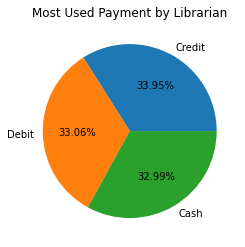

In [14]:
import matplotlib.pyplot as plt

isiLingkaran = spark.sql("""SELECT COUNT(RentID) as PaymentCount,Payment
                    FROM RentHeader 
                    GROUP BY Payment
                    HAVING PaymentCount >=1000
                    ORDER BY PaymentCount DESC""")
isiLingkaran.show()
isiLingkaran = isiLingkaran.toPandas()
plt.title("Most Used Payment by Librarian")
plt.pie(isiLingkaran['PaymentCount'],labels=isiLingkaran['Payment'],autopct="%.2f%%")
plt.show()

+----+---------+
|Year|TotalRent|
+----+---------+
|2016|     1236|
|2017|     1114|
|2018|     1401|
|2019|     1250|
|2020|     1553|
+----+---------+



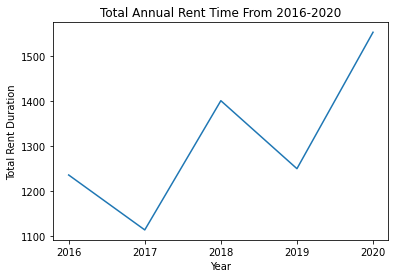

In [15]:
res2 = spark.sql("""SELECT YEAR(rt.RentDate) as Year, SUM(rd.RentDuration) AS TotalRent
                    FROM RentHeader rt
                    JOIN RentDetail rd on rt.RentID=rd.RentID
                    WHERE YEAR(rt.RentDate) BETWEEN 2016 AND 2020
                    GROUP BY Year
                    ORDER BY Year""")

res2.show()
res2=res2.toPandas()
plt.plot(res2['TotalRent'])
plt.xticks(range(len(res2['Year'])),res2['Year'])
plt.xlabel("Year")
plt.ylabel("Total Rent Duration")
plt.title("Total Annual Rent Time From 2016-2020")
plt.show()

+---------+----------+
|Frequency|Popularity|
+---------+----------+
|        2| Unpopular|
|        2|   Average|
|        4|   Popular|
+---------+----------+



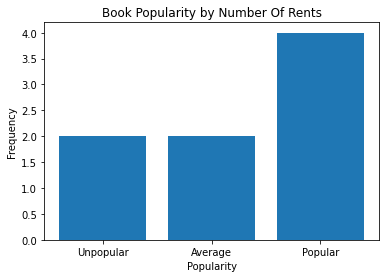

In [16]:
res3 = spark.sql("""SELECT COUNT(x.BookGenre) as Frequency, x.Popularity FROM(
                    SELECT b.BookGenre, COUNT(rd.BookID) as BookCount
                    ,
                    CASE
                        WHEN COUNT(rd.BookID)>=600 THEN 'Popular'
                        WHEN COUNT(rd.BookID)>=575 THEN 'Average'
                        ELSE 'Unpopular'
                    END AS Popularity
                    FROM Book b 
                    JOIN RentDetail rd ON b.BookID=rd.BookID 
                    WHERE b.BookGenre not in('Horror','Thriller')
                    GROUP BY b.BookGenre
                ) AS x 
                GROUP BY x.Popularity""")

res3.show()
res3=res3.toPandas()
plt.bar(res3['Popularity'],res3['Frequency'])
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title("Book Popularity by Number Of Rents")
plt.show()